# Visualize output T1 mapping tests

This is a try-out to visualize the test results from T1 mapping tests

## Import libraries

In [1]:
import os
import numpy
from matplotlib import pyplot
import csv
import pandas

## Linear fit methods

### Open cvs files with test results
Those are stored in test/results/ (this might need to change if we store multiple test files)

In [2]:
# first file of MJT
file_test_MJT = "TestResults_T1mapping_test_MJT_EdinburghUK_t1_VFA_lin.csv"

data_MJT = pandas.read_csv(file_test_MJT)
r1_ref = data_MJT['r1_ref']
r1_MJT = data_MJT['r1_measured']
label_MJT = 'MJT_EdinburghUK'

# file of Mcgill
file_test_Mcgill = "TestResults_T1mapping_test_mcgill_t1_VFA_lin.csv"
data_Mcgill = pandas.read_csv(file_test_Mcgill)
r1_Mcgill = data_Mcgill['r1_measured']
label_Mcgill = 'McGill_Can'

# file of ST_SydneyAus
file_test_ST = "TestResults_T1mapping_test_ST_SydneyAus_t1_VFA_lin.csv"
data_ST = pandas.read_csv(file_test_ST)
r1_ST = data_ST['r1_measured']
label_ST = 'ST_SydneyAus'

# file of OG_MO_AUMC_ICR_RHM
file_test_OG = "TestResults_T1mapping_test_OG_MO_AUMC_ICR_RHM_t1_VFA_2fa.csv"
data_OG = pandas.read_csv(file_test_OG)
r1_OG = data_OG['r1_measured']
label_OG = 'OG_MO_AUMC_ICR_RHM'
            

### DRO results
DRO data is are stored at rows 77 to 121 (corresponding to indices 76:120). Not sure if there is a better way then hardcoding this?

Plot figures in a bland-altman kind of way with on the x-axis the reference values and on the y-axis the difference between measured and true values.


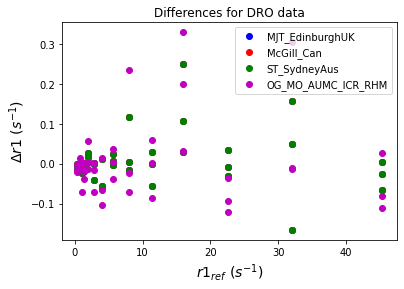

In [3]:
# calculate difference between measured and reference values
index_list = numpy.arange(76,121)
ref_DRO = r1_ref[index_list]
r1_MJT_DRO = r1_MJT[index_list]
r1_Mcgill_DRO = r1_Mcgill[index_list]
r1_ST_DRO = r1_ST[index_list]
r1_OG_DRO = r1_OG[index_list]

diff_MJT = r1_MJT_DRO - ref_DRO
diff_Mcgill = r1_Mcgill_DRO - ref_DRO
diff_ST = r1_ST_DRO - ref_DRO
diff_OG = r1_OG_DRO - ref_DRO

pyplot.figure(1)
pyplot.plot(ref_DRO, diff_MJT, "ob", label=label_MJT)
pyplot.plot(ref_DRO, diff_Mcgill,"or",label=label_Mcgill)
pyplot.plot(ref_DRO, diff_ST,"og",label=label_ST)
pyplot.plot(ref_DRO, diff_OG,"om",label=label_OG)
pyplot.title('Differences for DRO data')
pyplot.xlabel('$r1_{ref}$ ($s^{-1}$)', fontsize=14)
pyplot.ylabel('$\Delta r1$ ($s^{-1}$)', fontsize=14)
pyplot.legend()
pyplot.show()

For the DRO data, the results between the three linear implementations are almost identical.

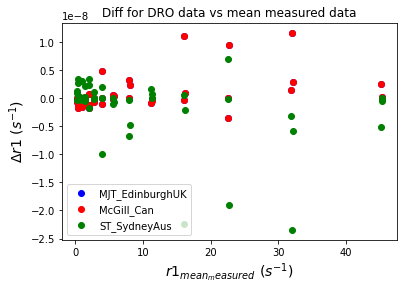

In [4]:
# extra plot to show differences between three linear methods
mean_meas_data = (r1_MJT_DRO + r1_Mcgill_DRO + r1_ST_DRO)/3
diff_MJT = r1_MJT_DRO - mean_meas_data
diff_Mcgill = r1_Mcgill_DRO - mean_meas_data
diff_ST = r1_ST_DRO - mean_meas_data

pyplot.figure(1)
pyplot.plot(mean_meas_data, diff_MJT, "ob", label=label_MJT)
pyplot.plot(mean_meas_data, diff_Mcgill,"or",label=label_Mcgill)
pyplot.plot(mean_meas_data, diff_ST,"og",label=label_ST)
pyplot.title('Diff for DRO data vs mean measured data')
pyplot.xlabel('$r1_{mean_measured}$ ($s^{-1}$)', fontsize=14)
pyplot.ylabel('$\Delta r1$ ($s^{-1}$)', fontsize=14)
pyplot.legend()
pyplot.show()

### In-vivo results
Brain data are for entries 1 to 76
Prostate data are for entries 122 to 170

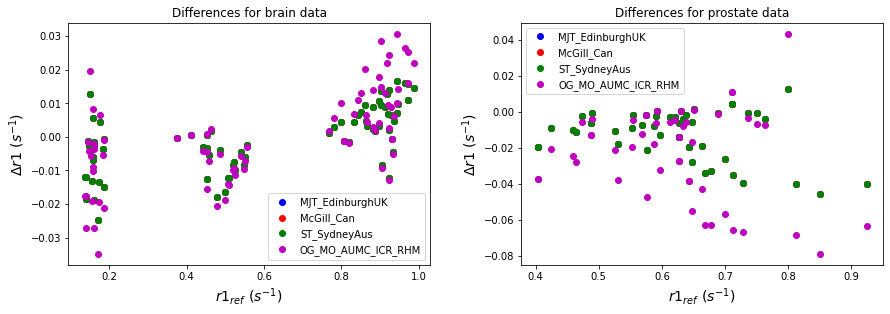

In [5]:
# calculate difference between measured and reference values
index_list_br = numpy.arange(0,76)
ref_brain = r1_ref[index_list_br]
r1_MJT_brain = r1_MJT[index_list_br]
r1_Mcgill_brain = r1_Mcgill[index_list_br]
r1_ST_brain = r1_ST[index_list_br]
r1_OG_brain = r1_OG[index_list_br]

diff_MJT_brain = r1_MJT_brain - ref_brain
diff_Mcgill_brain = r1_Mcgill_brain - ref_brain
diff_ST_brain = r1_ST_brain - ref_brain
diff_OG_brain = r1_OG_brain - ref_brain

index_list_pr = numpy.arange(121,170)
ref_pr = r1_ref[index_list_pr]
r1_MJT_pr = r1_MJT[index_list_pr]
r1_Mcgill_pr = r1_Mcgill[index_list_pr]
r1_ST_pr = r1_ST[index_list_pr]
r1_OG_pr = r1_OG[index_list_pr]

diff_MJT_pr = r1_MJT_pr - ref_pr
diff_Mcgill_pr = r1_Mcgill_pr - ref_pr
diff_ST_pr = r1_ST_pr - ref_pr
diff_OG_pr = r1_OG_pr - ref_pr

# plot results
fig, axs = pyplot.subplots(1, 2, figsize=(13,5))
axs[0].plot(ref_brain, diff_MJT_brain, "ob", label=label_MJT)
axs[0].plot(ref_brain, diff_Mcgill_brain, "or", label=label_Mcgill)
axs[0].plot(ref_brain, diff_ST_brain,"og",label=label_ST)
axs[0].plot(ref_brain, diff_OG_brain,"om",label=label_OG)
axs[0].set_title('Differences for brain data')
axs[0].set_xlabel('$r1_{ref}$ ($s^{-1}$)', fontsize=14)
axs[0].set_ylabel('$\Delta r1$ ($s^{-1}$)', fontsize=14)
axs[0].legend()

axs[1].plot(ref_pr, diff_MJT_pr, "ob", label=label_MJT)
axs[1].plot(ref_pr, diff_Mcgill_pr, "or", label=label_Mcgill)
axs[1].plot(ref_pr, diff_ST_pr,"og",label=label_ST)
axs[1].plot(ref_pr, diff_OG_pr,"om",label=label_OG)
axs[1].set_title('Differences for prostate data')
axs[1].set_xlabel('$r1_{ref}$ ($s^{-1}$)', fontsize=14)
axs[1].set_ylabel('$\Delta r1$ ($s^{-1}$)', fontsize=14)
axs[1].legend()

fig.tight_layout(pad=3.0)
pyplot.show()

## Nonlinear fit methods

### Open cvs files with test results
Those are stored in test/results/

In [6]:
# first file of MJT
file_test_MJT = "TestResults_T1mapping_test_MJT_EdinburghUK_t1_VFA_nonlin.csv"

data_MJT = pandas.read_csv(file_test_MJT)
r1_ref = data_MJT['r1_ref']
r1_MJT = data_MJT['r1_measured']

# file of Mcgill
file_test_Mcgill = "TestResults_T1mapping_test_mcgill_t1_novifast.csv"
data_Mcgill = pandas.read_csv(file_test_Mcgill)
r1_Mcgill = data_Mcgill['r1_measured']

# file of ST
file_test_ST = "TestResults_T1mapping_test_ST_SydneyAUS_t1_VFA_nonlin.csv"
data_ST = pandas.read_csv(file_test_ST)
r1_ST = data_ST['r1_measured']
            

### DRO results
DRO data is are stored at rows 77 to 121 (corresponding to indices 76:120). Not sure if there is a better way then hardcoding this?

Plot figures in a bland-altman kind of way with on the x-axis the reference values and on the y-axis the difference between measured and true values.


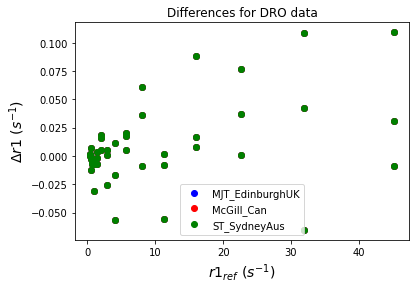

In [7]:
# calculate difference between measured and reference values
index_list = numpy.arange(76,121)
ref_DRO = r1_ref[index_list]
r1_MJT_DRO = r1_MJT[index_list]
r1_Mcgill_DRO = r1_Mcgill[index_list]
r1_ST_DRO = r1_ST[index_list]

diff_MJT = r1_MJT_DRO - ref_DRO
diff_Mcgill = r1_Mcgill_DRO - ref_DRO
diff_ST = r1_ST_DRO - ref_DRO

pyplot.figure(1)
pyplot.plot(ref_DRO, diff_MJT, "ob", label=label_MJT)
pyplot.plot(ref_DRO, diff_Mcgill,"or",label=label_Mcgill)
pyplot.plot(ref_DRO, diff_ST,"og",label=label_ST)
pyplot.title('Differences for DRO data')
pyplot.xlabel('$r1_{ref}$ ($s^{-1}$)', fontsize=14)
pyplot.ylabel('$\Delta r1$ ($s^{-1}$)', fontsize=14)
pyplot.legend()
pyplot.show()

### In-vivo results
Brain data are for entries 1 to 76
Prostate data are for entries 122 to 170

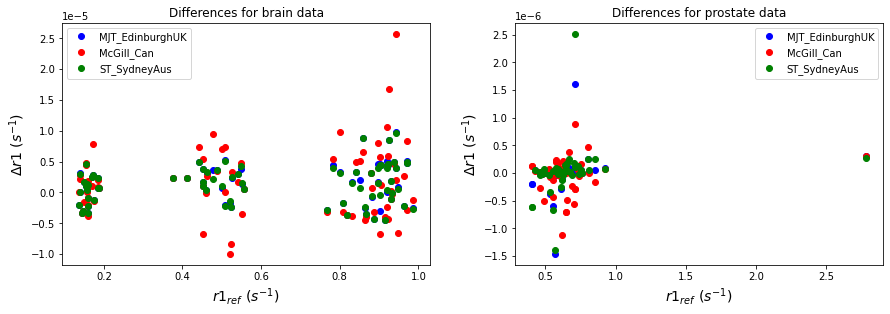

In [8]:
# calculate difference between measured and reference values
index_list_br = numpy.arange(0,76)
ref_brain = r1_ref[index_list_br]
r1_MJT_brain = r1_MJT[index_list_br]
r1_Mcgill_brain = r1_Mcgill[index_list_br]
r1_ST_brain = r1_ST[index_list_br]

diff_MJT_brain = r1_MJT_brain - ref_brain
diff_Mcgill_brain = r1_Mcgill_brain - ref_brain
diff_ST_brain = r1_ST_brain - ref_brain

index_list_pr = numpy.arange(121,170)
ref_pr = r1_ref[index_list_pr]
r1_MJT_pr = r1_MJT[index_list_pr]
r1_Mcgill_pr = r1_Mcgill[index_list_pr]
r1_ST_pr = r1_ST[index_list_pr]

diff_MJT_pr = r1_MJT_pr - ref_pr
diff_Mcgill_pr = r1_Mcgill_pr - ref_pr
diff_ST_pr = r1_ST_pr - ref_pr

# plot results
fig, axs = pyplot.subplots(1, 2, figsize=(13,5))
axs[0].plot(ref_brain, diff_MJT_brain, "ob", label=label_MJT)
axs[0].plot(ref_brain, diff_Mcgill_brain, "or", label=label_Mcgill)
axs[0].plot(ref_brain, diff_ST_brain, "og", label=label_ST)
axs[0].set_title('Differences for brain data')
axs[0].set_xlabel('$r1_{ref}$ ($s^{-1}$)', fontsize=14)
axs[0].set_ylabel('$\Delta r1$ ($s^{-1}$)', fontsize=14)
axs[0].legend()

axs[1].plot(ref_pr, diff_MJT_pr, "ob", label=label_MJT)
axs[1].plot(ref_pr, diff_Mcgill_pr, "or", label=label_Mcgill)
axs[1].plot(ref_pr, diff_ST_pr, "og", label=label_ST)
axs[1].set_title('Differences for prostate data')
axs[1].set_xlabel('$r1_{ref}$ ($s^{-1}$)', fontsize=14)
axs[1].set_ylabel('$\Delta r1$ ($s^{-1}$)', fontsize=14)
axs[1].legend()

fig.tight_layout(pad=3.0)
pyplot.show()